In [1]:
import numpy as np
import tifffile
import glob
import os

from reco_helper import reconstruct_one_slice, get_spectrum

from matplotlib import pyplot as plt
%matplotlib inline

from tqdm.auto import tqdm

In [3]:
before = np.load('/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_2840/proj_109.npy')
after = tifffile.imread('/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_2840_processed/proj_109.npy.tif')

In [4]:
before.shape, after.shape

((2840, 512, 512), (2838, 512, 512))

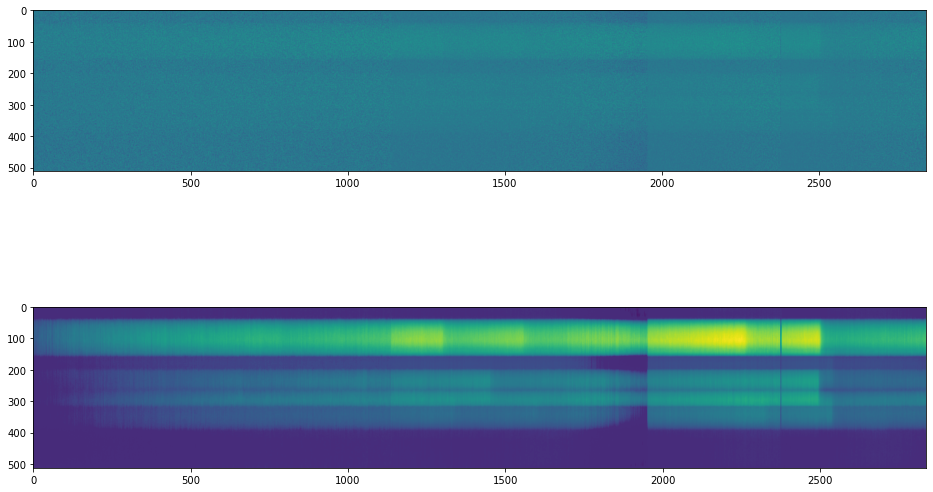

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 10))
ax1.imshow(before[:, 200].T)
ax2.imshow(after[:, 200].T)
plt.show()

In [6]:
%%time
slice_number = 127

sino_before = []
for i in tqdm(range(120)):
    sino_before.append(np.load(f'/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_2840/proj_{i}.npy', 
                               mmap_mode='r')[:, slice_number])
sino_before = np.stack(sino_before, axis=1)

  0%|          | 0/120 [00:00<?, ?it/s]

CPU times: user 1.93 s, sys: 21.9 s, total: 23.8 s
Wall time: 6min 3s


In [7]:
reco_before = reconstruct_one_slice(sino_before)

Finish FBP recon for channel 2839
FBP Reconstruction Complete!


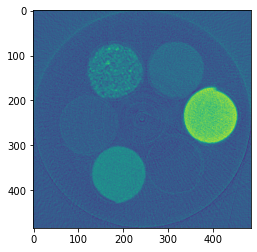

In [8]:
plt.imshow(reco_before.sum(0))

In [11]:
%%time
sino_after = []
for i in tqdm(range(120)):
    img = tifffile.memmap(f'/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_2840_processed/proj_{i}.npy.tif')
    sino_after.append(img[:, slice_number])
sino_after = np.stack(sino_after, axis=1)

  0%|          | 0/120 [00:00<?, ?it/s]

CPU times: user 4.16 s, sys: 28.8 s, total: 33 s
Wall time: 7min 31s


In [12]:
reco_after = reconstruct_one_slice(sino_after)

Finish FBP recon for channel 2837
FBP Reconstruction Complete!


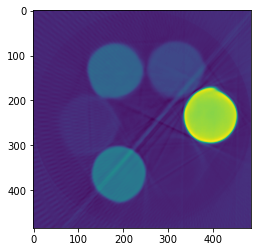

In [13]:
plt.imshow(reco_after.sum(0))

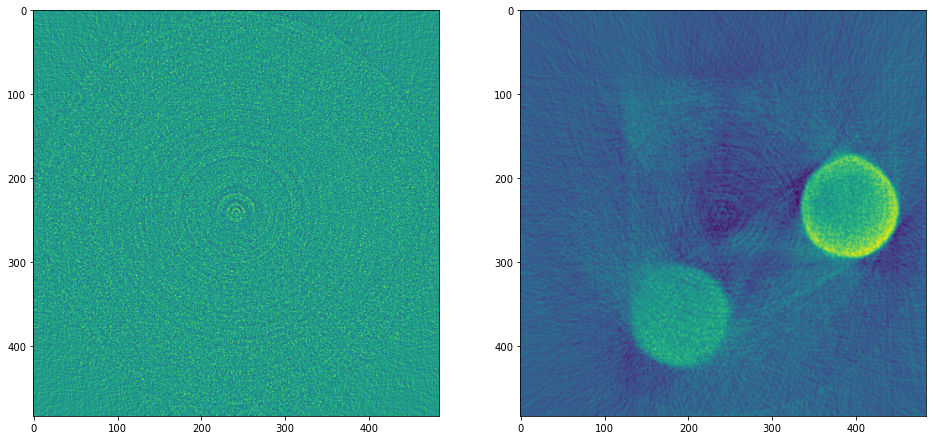

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(reco_before[0])
ax2.imshow(reco_after[0])
plt.show()

In [15]:
reco_after = np.concatenate([reco_after[[0]], reco_after, reco_after[[-1]]])

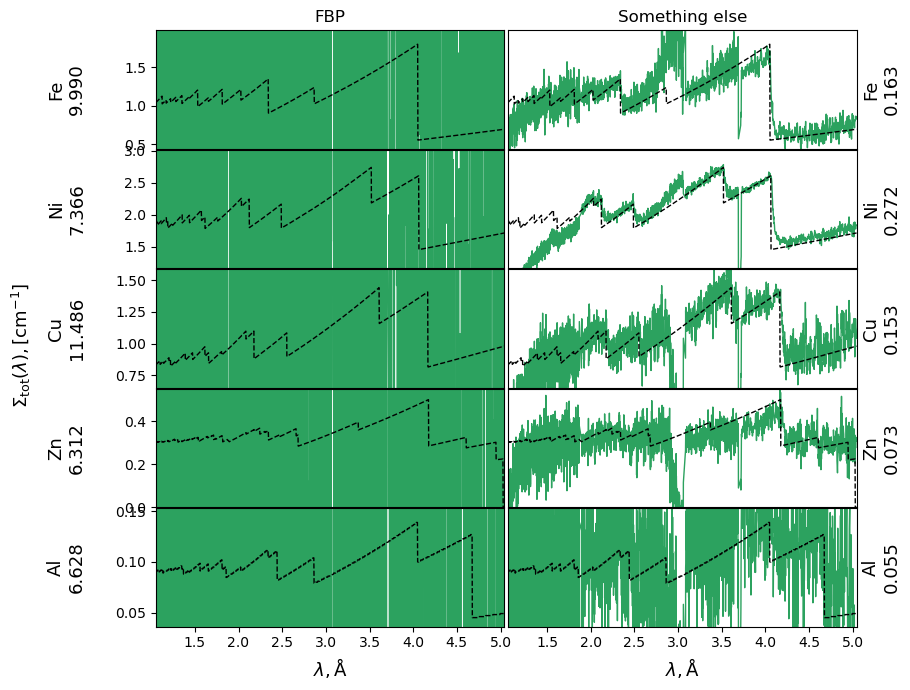

In [16]:
get_spectrum(reco_before, reco_after, binning=[1, 1, 1, 1])